In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

[*********************100%%**********************]  1 of 1 completed


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-05-17  189.509995  190.809998  189.179993  189.869995  189.869995   
2024-05-20  189.330002  191.919998  189.009995  191.039993  191.039993   
2024-05-21  191.089996  192.729996  190.919998  192.350006  192.350006   

              Volume  
Date                  
2024-05-17  41282900  
2024-05-20  44361300  
2024-05-21  42263500  
Stock Data:
Date
2024-05-17    189.869995
2024-05-20    191.039993
2024-05-21    192.350006
Name: Close, dtype: float64


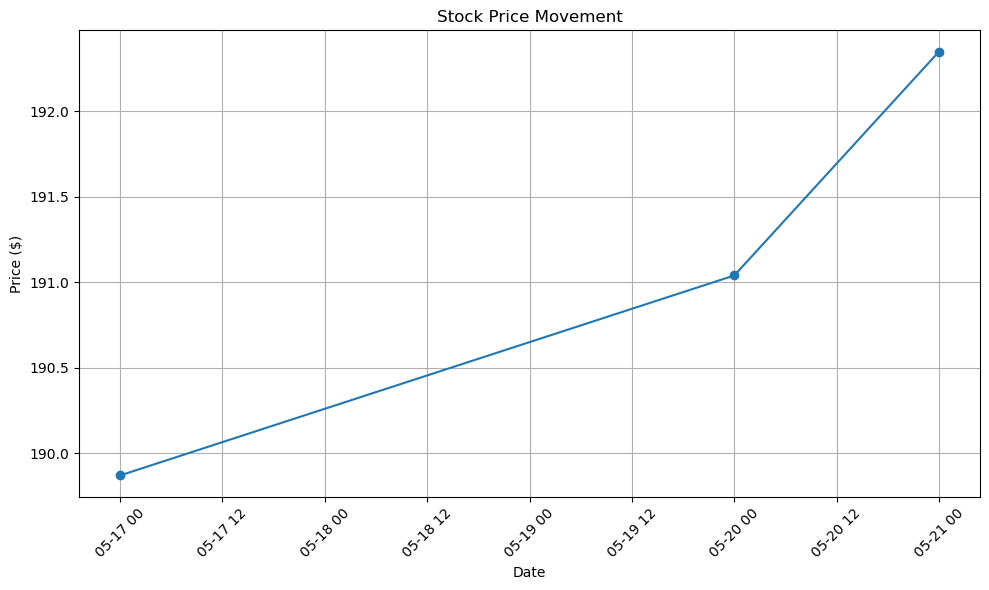

In [3]:
def fetch_historical_data(stock_symbol, num_days):
    end_date = pd.Timestamp.today() - pd.Timedelta(days=1)  
    start_date = end_date - pd.Timedelta(days=num_days)
    try:
        stock = yf.download(stock_symbol, start=start_date, end=end_date)
        print(stock)
        if stock.empty:
            raise ValueError(f"No data found for {stock_symbol}.")
        return stock['Close']
    except Exception as e:
        print(f"Error fetching data for {stock_symbol}: {e}")
        return pd.Series()

def visualize_stock_data(df):
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df, marker='o', linestyle='-')
    plt.title('Stock Price Movement')
    plt.xlabel('Date')
    plt.ylabel('Price ($)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def main():
    stock_symbol = input("Enter the stock symbol (e.g., AAPL for Apple Inc.): ")
    num_days = int(input("Enter the number of days of data to fetch: "))

    stock_data = fetch_historical_data(stock_symbol, num_days)

    if stock_data.empty:
        print(f"No data found for {stock_symbol}.")
        return  

    print("Stock Data:")
    print(stock_data)

    visualize_stock_data(stock_data)

if __name__ == "__main__":
    main()
